In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns

In [2]:
#read the table
df=pd.read_csv("processed.cleveland.data",header= None)

In [3]:
#assign the column names
df.columns=['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','num'] 


In [4]:
#see if anything is null
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  num       303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB


In [5]:
#remove unwanted characters
df=df.replace('\?','',regex=True)

In [6]:
#convert objects to float
df["thal"] = pd.to_numeric(df["thal"], downcast="float")
df["ca"] = pd.to_numeric(df["ca"], downcast="float")

In [7]:
#drop if there are NAs
df= df.dropna()


In [8]:
#check for duplicates
df.duplicated().sum()

0

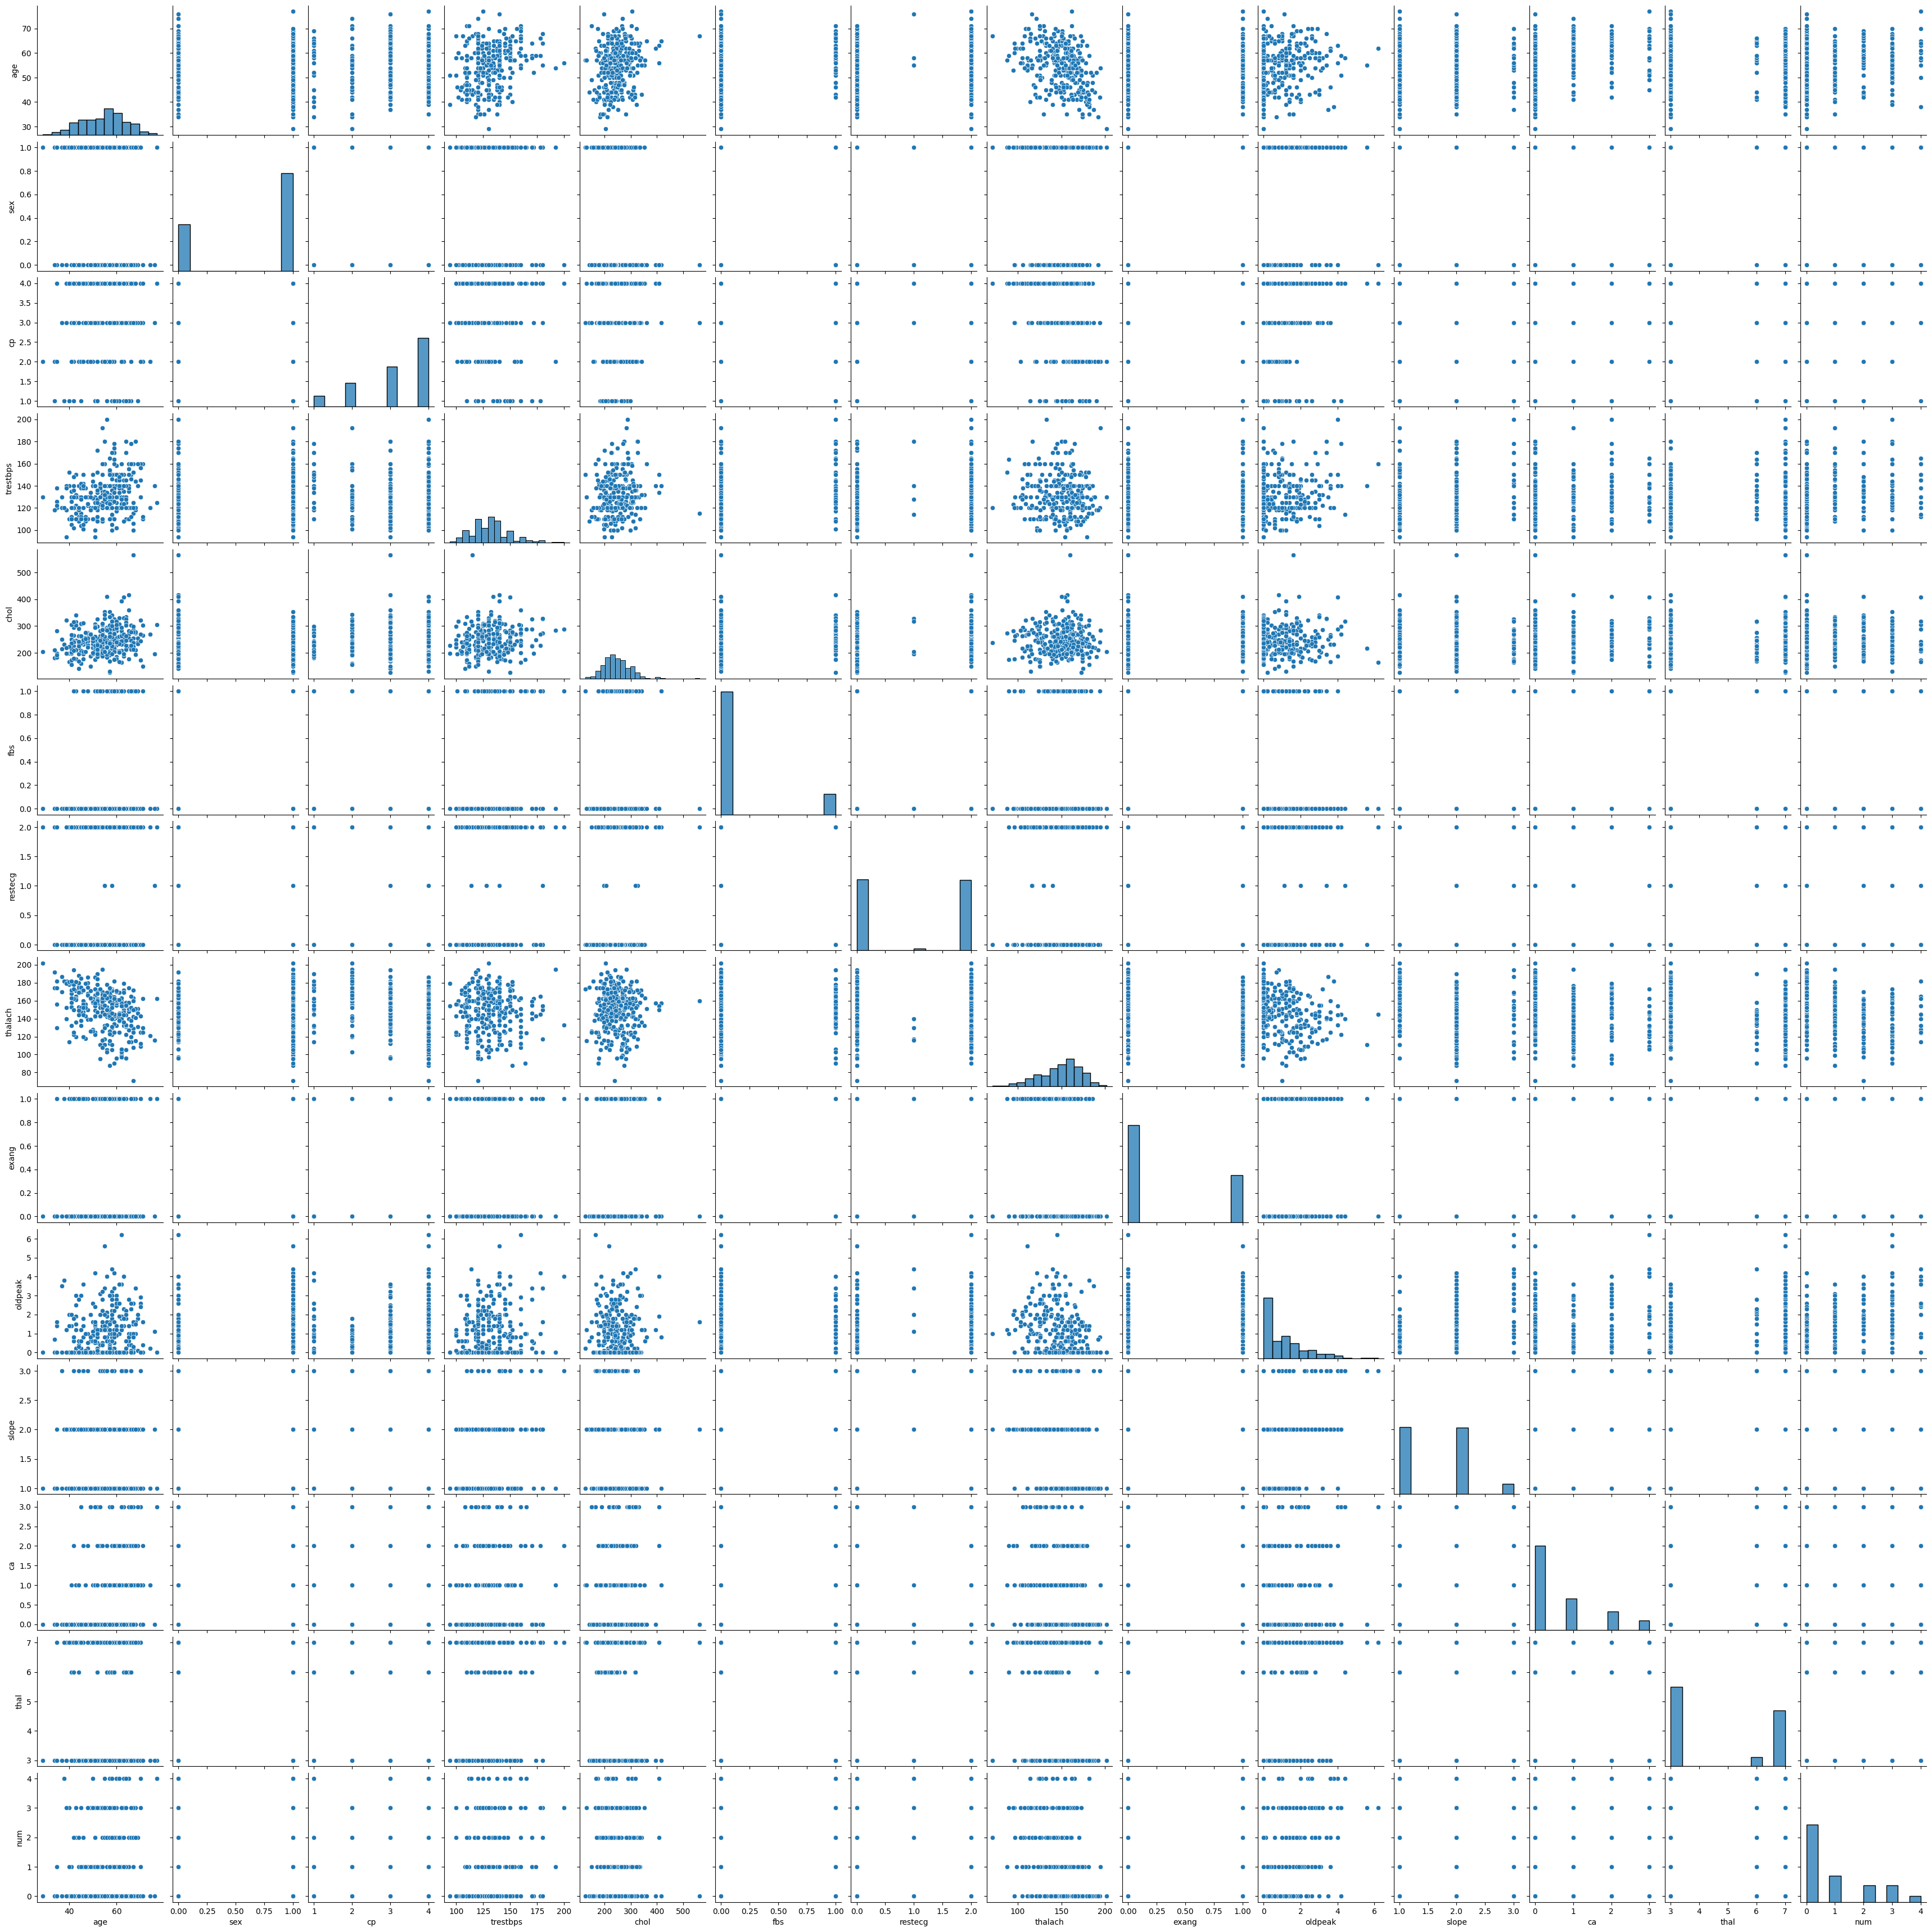

In [9]:
#pairplot
sns.pairplot(df)

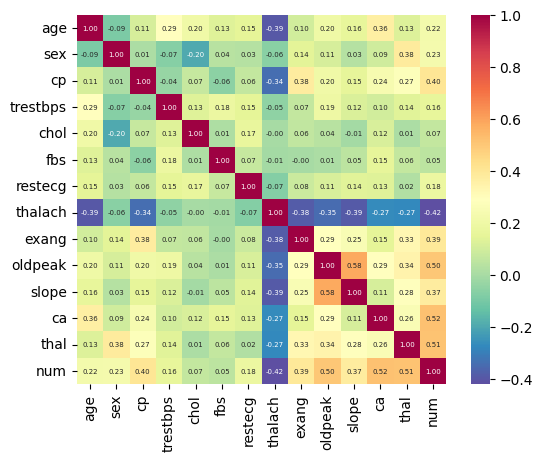

In [10]:
#correlation plot
corrmat = df.corr()
hm = sns.heatmap(corrmat, 
                 cbar=True, 
                 annot=True, 
                 square=True, 
                 fmt='.2f', 
                 annot_kws={'size': 5}, 
                 yticklabels=df.columns, 
                 xticklabels=df.columns, 
                 cmap="Spectral_r")
plt.show()

In [11]:
#select the features and split in test and train data
feature_names = ['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal'] 
X = df[feature_names]
y = df['num']

In [12]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5,random_state=12345)

([<matplotlib.axis.XTick at 0x24a88f9e430>,
 [Text(0, 0, '0'),
  Text(5, 0, '5'),
  Text(10, 0, '10'),
  Text(15, 0, '15'),
  Text(20, 0, '20'),
  Text(25, 0, '25'),
  Text(30, 0, '30'),
  Text(35, 0, '35'),
  Text(40, 0, '40')])

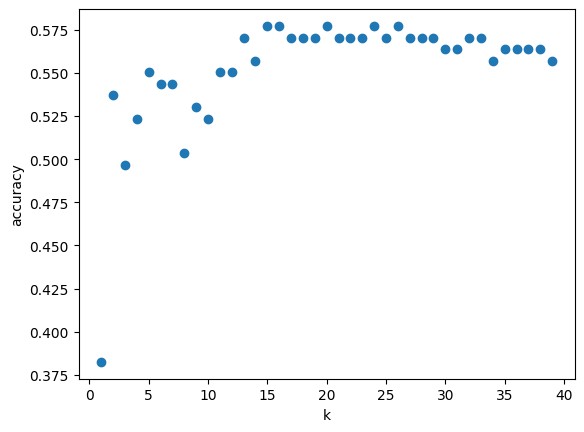

In [13]:
#check for all possible k
from sklearn.neighbors import KNeighborsClassifier
k_range = range(1, 40)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20,25,30,35,40])

### But as we have less number of heart diesease 4, we cannot take the k with high accuracy

In [14]:
#Create KNN Classifier 
knn = KNeighborsClassifier()

#Train the model using the training sets
knn.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = knn.predict(X_test)

In [15]:
#calculate confusion matrix and accuracy
from sklearn.metrics import confusion_matrix,accuracy_score
import numpy as np
y_pred = np.round(y_pred)
acc = accuracy_score(y_test,y_pred)
cm = confusion_matrix(y_test, y_pred)

In [16]:
acc

0.5503355704697986

In [17]:
cm

array([[74,  5,  2,  1,  1],
       [22,  4,  2,  1,  1],
       [10,  2,  2,  3,  0],
       [ 7,  2,  1,  2,  0],
       [ 3,  3,  1,  0,  0]], dtype=int64)

In [18]:
from sklearn.metrics import classification_report,roc_curve,roc_auc_score
#import numpy as np

#print(classification_report(y_test,y_pred))

In [19]:
#calculate Specitifity and Sensitivity
def calculate_spec_sens(cf):
    spec=[]*len(cf)
    sens=[]*len(cf)
    for i in range(len(cf)):
        sum_cf = cf.sum(axis=(0,1))
        TP = cf[i,i]
        TN = sum_cf - cf[:,i].sum() - cf[i,:].sum() + TP
        FP = cf[i,:].sum() - TP
        FN = cf[:,i].sum() - TP
        temp_spec = TN/(TN+FP)
        temp_sens = TP/(TP+FN)
        sens.append(temp_sens)
        spec.append(temp_spec)
    avg_spec = sum(spec)/len(cf)
    avg_sens = sum(sens)/len(cf)
    return avg_spec,avg_sens
    #for sensitivity we can use precision

In [20]:
avg_spec,avg_sens = calculate_spec_sens(cm)

In [21]:
avg_spec,avg_sens,acc

(0.8614718887828993, 0.2847290640394089, 0.5503355704697986)

<BarContainer object of 3 artists>

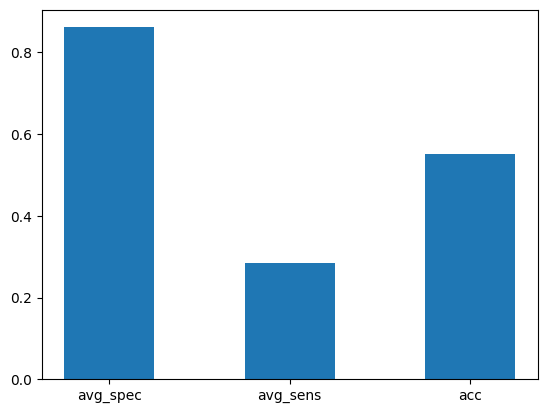

In [22]:
fig,ax = plt.subplots()
ax.bar([1,2,3],[avg_spec,avg_sens,acc], width=0.5,
        tick_label=['avg_spec','avg_sens','acc'], align='center')

C:\Users\Aakas\miniconda3\envs\myenv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


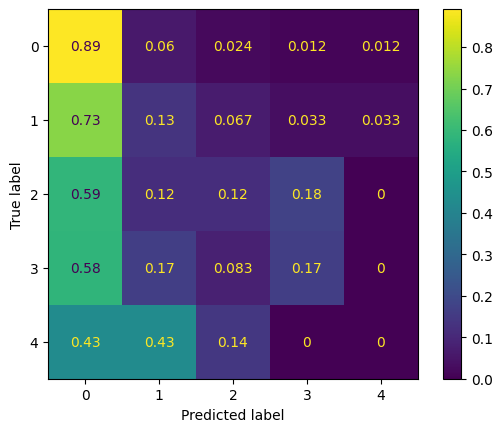

In [23]:
#plot heatmap for cm:
#plot heatmap for cm:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(knn,X_test,y_test,normalize= "true")

# repeat with heart disease vs no heart disease data:

In [24]:
#repeat with heart disease vs no heart disease data:
df["num"][df["num"] > 0] = 1

In [25]:
#check if it worked:
df["num"].unique()

array([0, 1], dtype=int64)

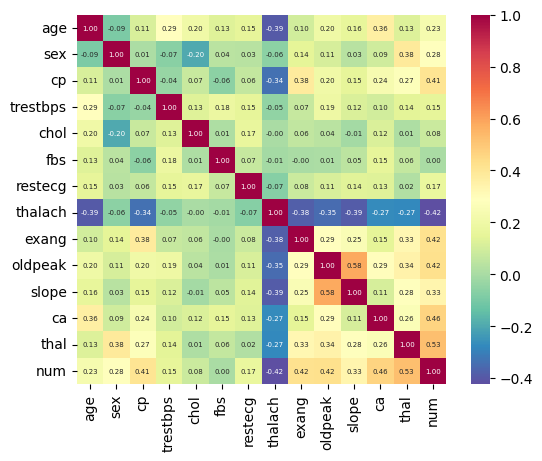

In [26]:
#correlation plot
corrmat = df.corr()
hm = sns.heatmap(corrmat, 
                 cbar=True, 
                 annot=True, 
                 square=True, 
                 fmt='.2f', 
                 annot_kws={'size': 5}, 
                 yticklabels=df.columns, 
                 xticklabels=df.columns, 
                 cmap="Spectral_r")
plt.show()

In [27]:
feature_names = ['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal'] 
X = df[feature_names]
y = df['num']

In [28]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5,random_state=12345)

([<matplotlib.axis.XTick at 0x24a885a1d90>,
 [Text(0, 0, '0'),
  Text(5, 0, '5'),
  Text(10, 0, '10'),
  Text(15, 0, '15'),
  Text(20, 0, '20'),
  Text(25, 0, '25'),
  Text(30, 0, '30'),
  Text(35, 0, '35'),
  Text(40, 0, '40')])

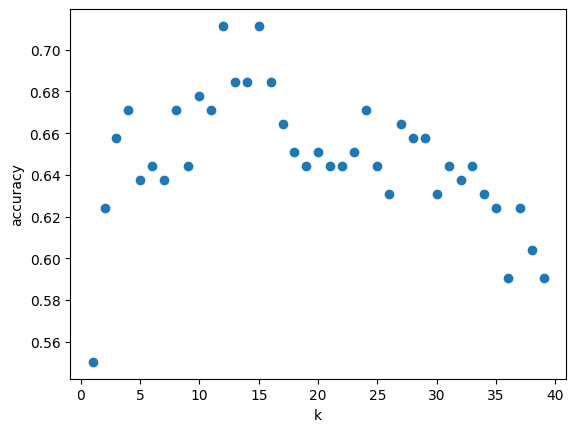

In [29]:
#check for all possible k
from sklearn.neighbors import KNeighborsClassifier
k_range = range(1, 40)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20,25,30,35,40])

#### here we have only two catagories: heart disease and non heart disease, so we can take the k with highest accuracy

In [30]:
#Create KNN Classifier 
knn = KNeighborsClassifier(n_neighbors=15)

#Train the model using the training sets
knn.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = knn.predict(X_test)

In [31]:
from sklearn.metrics import confusion_matrix,accuracy_score
y_pred = np.round(y_pred)
cm = confusion_matrix(y_test, y_pred)
#acc = accuracy_score(y_test,y_pred)

In [32]:
#acc

In [33]:
cm

array([[60, 23],
       [20, 46]], dtype=int64)

In [34]:
from sklearn.metrics import confusion_matrix,classification_report,roc_curve,roc_auc_score
import numpy as np

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.75      0.72      0.74        83
           1       0.67      0.70      0.68        66

    accuracy                           0.71       149
   macro avg       0.71      0.71      0.71       149
weighted avg       0.71      0.71      0.71       149



In [35]:
#Confusion matrix, Accuracy, sensitivity and specificity
from sklearn.metrics import confusion_matrix, roc_curve,roc_auc_score

cm1 = cm
print('Confusion Matrix : \n', cm1)

total1=sum(sum(cm1))
#####from confusion matrix calculate accuracy
accuracy1=(cm1[0,0]+cm1[1,1])/total1
print ('Accuracy : ', accuracy1)

sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity : ', sensitivity1 )

specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity : ', specificity1)

Confusion Matrix : 
 [[60 23]
 [20 46]]
Accuracy :  0.7114093959731543
Sensitivity :  0.7228915662650602
Specificity :  0.696969696969697


In [36]:
specificity1,sensitivity1,accuracy1

(0.696969696969697, 0.7228915662650602, 0.7114093959731543)

<BarContainer object of 3 artists>

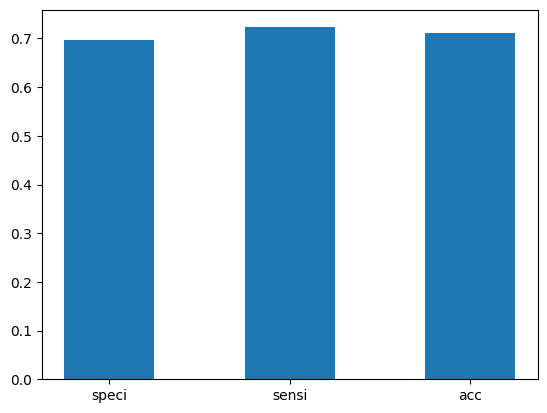

In [37]:
fig,ax = plt.subplots()
ax.bar([1,2,3],[specificity1,sensitivity1,accuracy1], width=0.5,
        tick_label=['speci','sensi','acc'], align='center')

C:\Users\Aakas\miniconda3\envs\myenv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


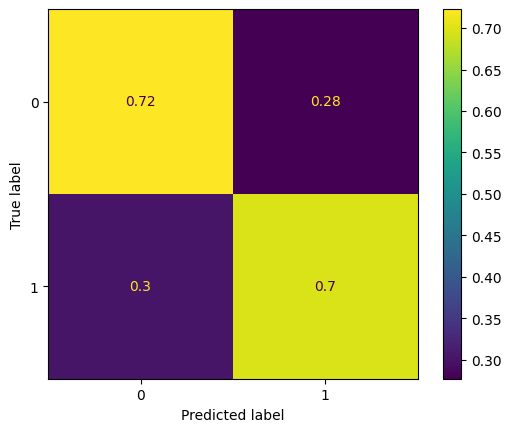

In [38]:
#plot heatmap for cm:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(knn,X_test,y_test,normalize= "true")

In [39]:
#ROC curve
fpr,tpr,_ = roc_curve(y_test,y_pred)
auc = roc_auc_score(y_test,y_pred)

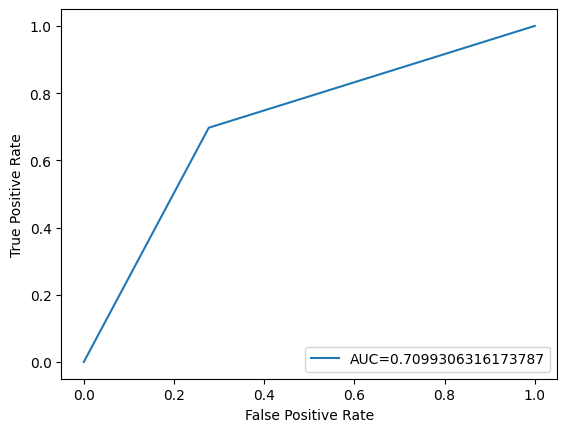

In [40]:
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()